In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from doepy import build
import pandas as pd

This code was used to build the original set of 50 samples. Be careful to not overwrite the original samples table if you rerun this cell!

In [3]:
samples = build.space_filling_lhs(
    {
        "lambda_x": [0.5, 30], #500 um to 3 cm
        "ratio_lambda_y_x": [0.1, 1], # lambda_y = ratio * lambda_x (ie lambda_y is less than or equal to lambda_x)
        "lambda_z": [0.5, 30],
        "theta_x": [0, 90], #rotation about x axis, degrees
        "theta_y":[0, 90], #rotation about y axis, degrees
        "porosity": [0, 0.95], #free volume in structure. 0 = solid, 0.95 = only 5% of the volume is solid
    },
    num_samples=25, #number of structures to generate across the space
)

# samples.to_csv("20231204 initial 50 samples.csv", index=False)
samples.head()

,lambda_x,ratio_lambda_y_x,lambda_z,theta_x,theta_y,porosity
0,4.187500,0.7750,25.083333,22.50,63.75,0.910417
1,17.708333,1.0000,20.166667,63.75,41.25,0.356250
2,18.937500,0.9625,21.395833,52.50,26.25,0.277083
3,23.854167,0.8125,28.770833,48.75,52.50,0.197917
4,26.312500,0.6250,27.541667,30.00,7.50,0.870833


In [4]:
samples = pd.read_csv("20231204 initial 50 samples.csv")
samples.head()

,lambda_x,ratio_lambda_y_x,lambda_z,theta_x,theta_y,porosity
0,21.571429,0.448980,19.765306,23.877551,20.204082,0.038776
1,13.142857,0.926531,18.561224,82.653061,78.979592,0.155102
2,7.122449,0.742857,19.163265,53.265306,66.122449,0.581633
3,2.908163,0.889796,13.744898,38.571429,77.142857,0.116327
4,23.377551,0.412245,12.540816,86.326531,80.816327,0.523469


See how the 50 samples are evenly distributed across the design space

c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

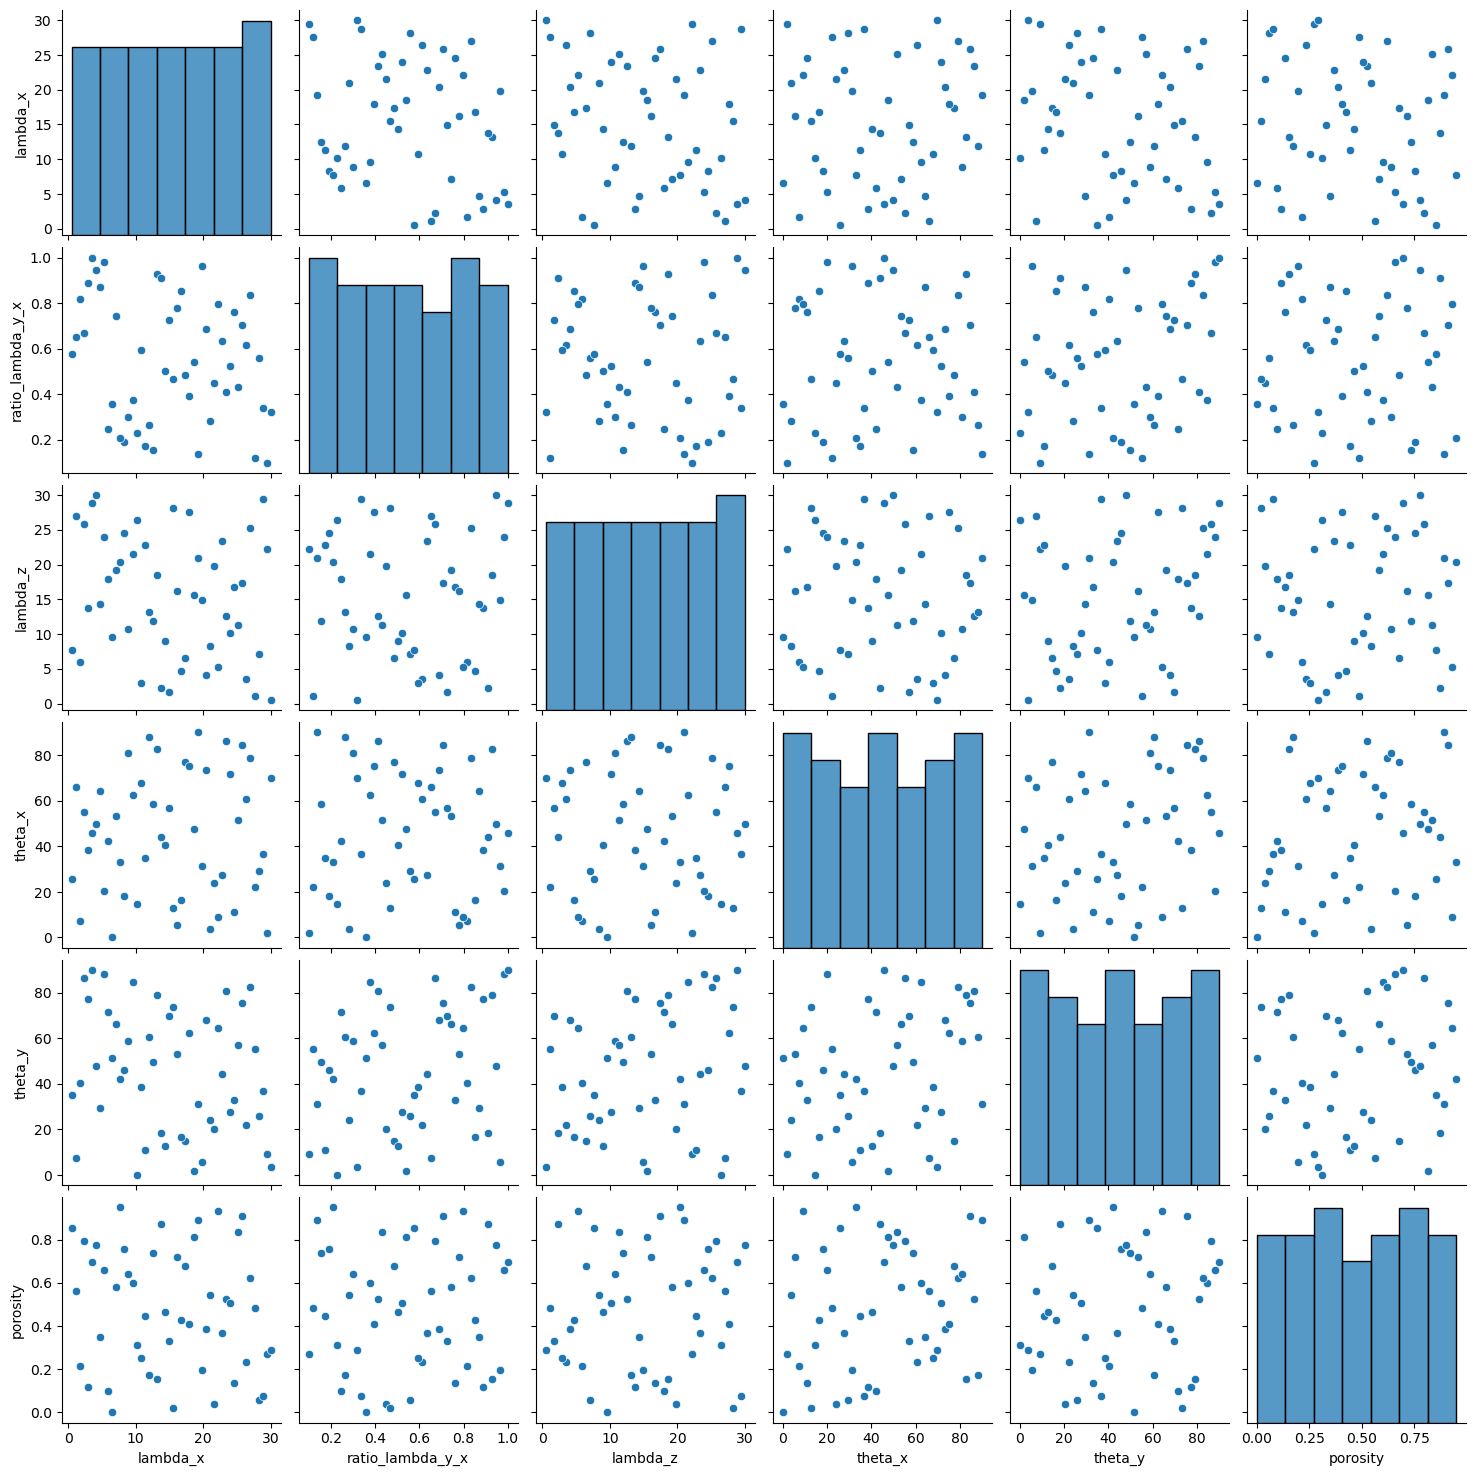

In [5]:
sns.pairplot(samples)

# Generate the STL files for the initial 25 structures

This can take some time to run. We use the same initial 25 parameters for both diamond and gyroid structures, yielding a total of 50 structures (25 for each class of TPMS).

## Gyroid structures

In [6]:
from spartantpms import gyroid_box, generate_stl

In [7]:
row

NameError: name 'row' is not defined

In [8]:
for structure_number, row in samples.iterrows():
    f = gyroid_box(
        lambda_x = row["lambda_x"],
        lambda_y = row["lambda_x"] * row["ratio_lambda_y_x"],
        lambda_z=row["lambda_z"],
        theta_x=row["theta_x"],
        theta_y=row["theta_y"],
        theta_z=0, #rotation about z is degenerate when stressing along z axis.
        porosity=row["porosity"],
        n_periods=4
    )
    
    
    
    generate_stl(
        f=f,
        fpath=f"gyroid_{structure_number}.stl",
        step=0.2
    )
    
    break

min -47.3441, -23.6721, -46.3779
max 47.3441, 23.6721, 46.3779
step 0.2, 0.2, 0.2
Wrote file to gyroid_0.stl
